In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, activation, LSTM
import matplotlib.pyplot as plt

In [2]:
train_datasets = pd.read_csv("https://raw.githubusercontent.com/ahmadriad/The-Deep-Learning-with-Keras-Workshop/master/Chapter09/AMZN_train.csv")
train_datasets.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [3]:
training_data = train_datasets[['Open']].values

training_data.shape

(1258, 1)

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_data_scalled = sc.fit_transform(training_data)
training_data_scalled

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [8]:
X_train=[]
Y_train=[]
for i in range(60,1258):
    X_train.append(training_data_scalled[i-60:i,])
    Y_train.append(training_data_scalled[i,0])
    
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_train.shape

(1198, 60, 1)

In [10]:
print(X_train.shape,Y_train.shape)

(1198, 60, 1) (1198,)


In [11]:
seed=1
np.random.seed(seed)

In [13]:
model = Sequential()

model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss="MSE",optimizer="adam")

model.fit(X_train,Y_train,epochs=100,batch_size=30)

Epoch 1/100
40/40 [==============================] - 16s 141ms/step - loss: 0.0238
Epoch 2/100
40/40 [==============================] - 5s 135ms/step - loss: 0.0012
Epoch 3/100
40/40 [==============================] - 3s 86ms/step - loss: 0.0011
Epoch 4/100
40/40 [==============================] - 4s 97ms/step - loss: 0.0012
Epoch 5/100
40/40 [==============================] - 6s 140ms/step - loss: 0.0011
Epoch 6/100
40/40 [==============================] - 5s 120ms/step - loss: 0.0011
Epoch 7/100
40/40 [==============================] - 3s 79ms/step - loss: 9.4334e-04
Epoch 8/100
40/40 [==============================] - 5s 119ms/step - loss: 0.0012
Epoch 9/100
40/40 [==============================] - 5s 136ms/step - loss: 0.0010
Epoch 10/100
40/40 [==============================] - 3s 85ms/step - loss: 8.6403e-04
Epoch 11/100
40/40 [==============================] - 3s 81ms/step - loss: 8.0624e-04
Epoch 12/100
40/40 [==============================] - 6s 143ms/step - loss: 0.0011
Epoch

40/40 [==============================] - 5s 114ms/step - loss: 2.0340e-04
Epoch 97/100
40/40 [==============================] - 5s 137ms/step - loss: 2.3919e-04
Epoch 98/100
40/40 [==============================] - 3s 82ms/step - loss: 2.0803e-04
Epoch 99/100
40/40 [==============================] - 3s 75ms/step - loss: 1.8253e-04
Epoch 100/100
40/40 [==============================] - 5s 137ms/step - loss: 2.0235e-04


In [14]:
testing_datasets= pd.read_csv("https://raw.githubusercontent.com/ahmadriad/The-Deep-Learning-with-Keras-Workshop/master/Chapter09/AMZN_test.csv")
testing_datasets.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/19,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
1,1/3/19,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2,1/4/19,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
3,1/7/19,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200
4,1/8/19,1664.689941,1676.609985,1616.609985,1656.579956,1656.579956,8881400


In [15]:
testing_data= testing_datasets[["Open"]].values
testing_data.shape

(21, 1)

In [16]:
total_data = pd.concat((train_datasets["Open"],testing_datasets["Open"]),axis=0)
inputs = total_data[len(total_data) - len(testing_datasets['Open'])-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.fit_transform(inputs)

X_test=[]

for i in range(60,81):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


In [17]:
predicted_stock_price.shape

(21, 1)

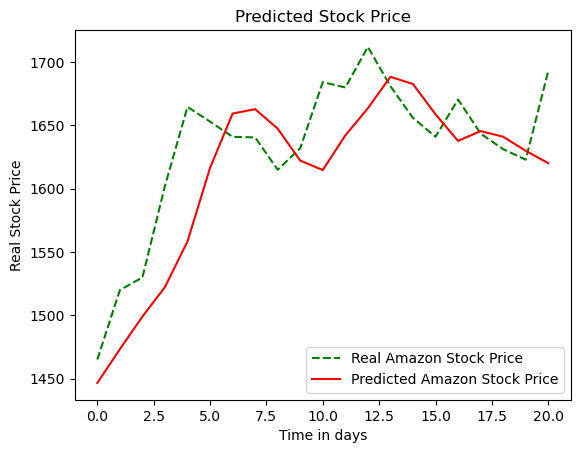

In [18]:
plt.plot(testing_data,"g--", label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()